In [1]:
import jax
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

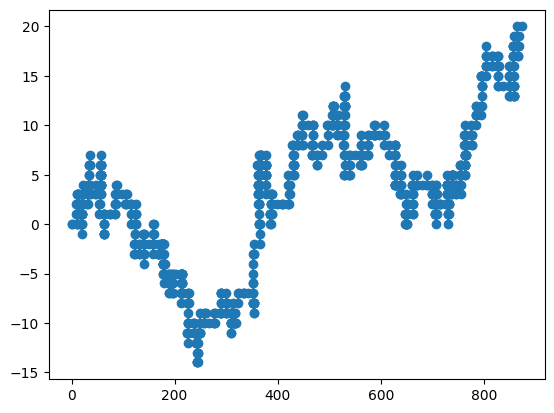

In [32]:
def random_walk(key, bigstep_p=0.1, time=100):
    if time <= 1:
        return jnp.array([0.0, 0.0])

    p_right = 0.25 * (1-bigstep_p)
    p_left = 0.25 * (1-bigstep_p)
    p_up = 0.25 * (1-bigstep_p)
    p_down = 0.25 * (1-bigstep_p)

    probs = jnp.array([p_right, p_left, p_up, p_down, bigstep_p])
    movements = jnp.array([[1, 0], [-1, 0], [0, 1], [0, -1], [10, 0]])

    key, subkey = random.split(key)
    step_indices = random.choice(subkey, 5, shape=(time - 1,), p=probs)
    steps = movements[step_indices]
    positions = jnp.cumsum(steps, axis=0)
    positions = jnp.vstack([jnp.array([0.0, 0.0]), positions])
    x = positions[:, 0]
    y = positions[:, 1]

    return positions[:, 0], positions[:, 1]

x, y = random_walk(random.PRNGKey(np.random.randint(0, 100)), time=1000)

plt.plot(x, y, marker = 'o')
plt.show()


In [46]:
def random_direction_walk_only_last(key, bigstep_p=0.1, time=100):
    if time <= 1:
        return jnp.array([0.0, 0.0])

    p_right = 0.25 * (1-bigstep_p)
    p_left = 0.25 * (1-bigstep_p)
    p_up = 0.25 * (1-bigstep_p)
    p_down = 0.25 * (1-bigstep_p)

    probs = jnp.array([p_right, p_left, p_up, p_down, bigstep_p])
    movements = jnp.array([[1, 0], [-1, 0], [0, 1], [0, -1], [10, 0]])

    key, subkey = random.split(key)
    step_indices = random.choice(subkey, 5, shape=(int(time) - 1,), p=probs)
    steps = movements[step_indices]
    position = jnp.sum(steps, axis=0)

    return position[0], position[1]

Slope is: 0.9900370624014097


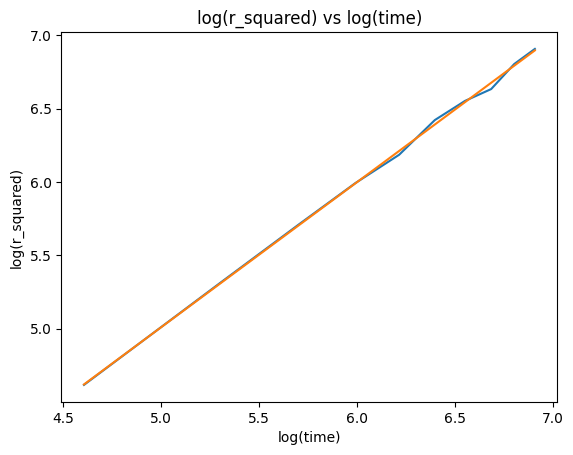

In [47]:
N = 50
timerange = np.linspace(100, 1000, 10)
mean_r_squared = []
for t in timerange:
    r_squared_temp = 0
    for _ in range(N):
        x, y = random_direction_walk_only_last(random.PRNGKey(np.random.randint(0, 100)), time=t)
        r_squared_temp += (x**2 + y**2)/N
    mean_r_squared.append(r_squared_temp)
r_rms = np.sqrt(mean_r_squared)

log_timerange = np.log(timerange)
log_r_rms = np.log(r_rms)
slope, intercept, r_value, p_value, std_err = stats.linregress(log_timerange, log_r_rms)

plt.plot(log_timerange, log_r_rms)
plt.plot(log_timerange, slope * log_timerange + intercept)
print("Slope is:", slope)
plt.xlabel('log(time)')
plt.ylabel('log(r_squared)')
plt.title('log(r_squared) vs log(time)')
plt.show()